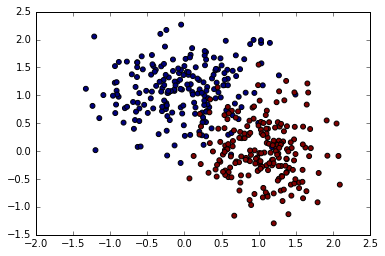

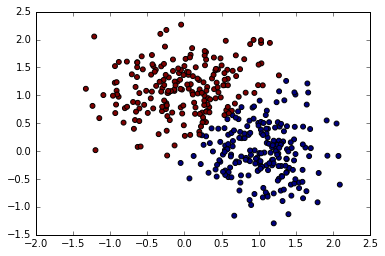

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat
from scipy.stats import multivariate_normal

epsilon = 0.01

class GMM:
    
    def __init__(self, Points, parameters):
        self.eps = 0.01
        self.parameters = parameters
        self.Points = Points
        self.Prediction = []
        
    def E_step(self):
        self.Prediction = [0] * len(self.Points)
        for index, point in enumerate(self.Points):
            p0 = self.parameters['lam'][0] * multivariate_normal.pdf(point, self.parameters['m_0'], self.parameters['sig_0'])
            p1 = self.parameters['lam'][1] * multivariate_normal.pdf(point, self.parameters['m_1'], self.parameters['sig_1'])
            if p0 > p1:
                self.Prediction[index] = 0
            else:         
                self.Prediction[index] = 1

    def M_step(self, parameters):
        points_of_cluster0 = [point for index,point in enumerate(self.Points) if self.Prediction[index]==0]
        points_of_cluster1 = [point for index,point in enumerate(self.Points) if self.Prediction[index]==1]

        parameters['lam'] = [len(points_of_cluster0) * 1.0 / (len(points_of_cluster0) + len(points_of_cluster1)), len(points_of_cluster1) * 1.0 / (len(points_of_cluster0) + len(points_of_cluster1))]

        parameters['m_0'] = np.mean(np.array(points_of_cluster0), axis=0)
        parameters['m_1'] = np.mean(np.array(points_of_cluster1), axis=0)

        parameters['sig_0'] = np.std(np.array(points_of_cluster0), axis=0)
        parameters['sig_1'] = np.std(np.array(points_of_cluster1), axis=0)
        
        self.updated_parameters = parameters.copy()
    
    def run(self):
        distance = 100
        iteration = 1
        while distance > self.eps:
            
            # fig = plt.figure()
            # plt.scatter(self.Points[:,0], self.Points[:,1], 24, c=self.Prediction)
            # plt.show()
            # fig.savefig('./Results/iteration-'+str(iteration)+'.png')
            # iteration += 1
            
            self.E_step()
            self.M_step(self.parameters.copy())

            distance = np.sqrt(np.sum(np.square(self.parameters['m_0']-self.updated_parameters['m_0'])
                           +np.square(self.parameters['m_1']-self.updated_parameters['m_1'])))

            self.parameters = self.updated_parameters.copy()

Data = loadmat('GMM-Points.mat')
Points = Data['Points'][:,0:2]
Label = Data['Points'][:,2]

fig = plt.figure()
plt.scatter(Points[:,0], Points[:,1], 24, c=Label)
plt.show()

parameters = dict([('m_0', [0.2, 0.2]), ('sig_0', [0.5, 0.5]), ('m_1', [0.8, 0.8]), ('sig_1', [0.5, 0.5]), ('lam', [0.5, 0.5])])
gmm = GMM(Points, parameters)
gmm.run()

fig = plt.figure()
plt.scatter(Points[:,0], Points[:,1], 24, c=gmm.Prediction)
plt.show()

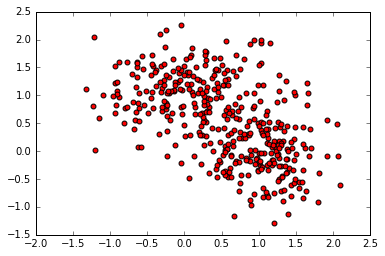

In [22]:
fig = plt.figure()
p=gmm.Prediction
for index in range(len(p)):
    p[index]=1
plt.scatter(Points[:,0], Points[:,1], 24, c='red')
plt.show()
fig.savefig('./Results/iteration-'+str(4)+'.png')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat
from scipy.stats import multivariate_normal

Data = loadmat('GMM-Points.mat')
Points = Data['Points'][:,0:3]
Label = Data['Points'][:,2]

print Data['Points'].shape
print Points.shape
print Label.shape

(400, 3)
(400, 3)
(400,)


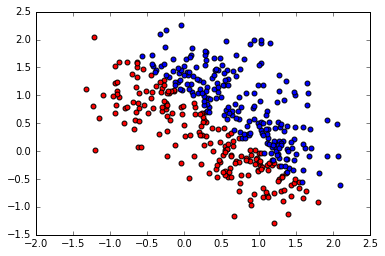

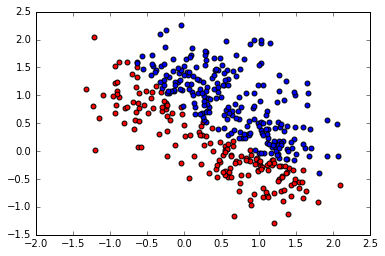

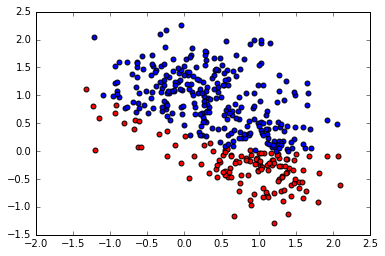

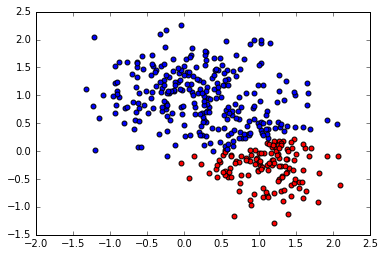

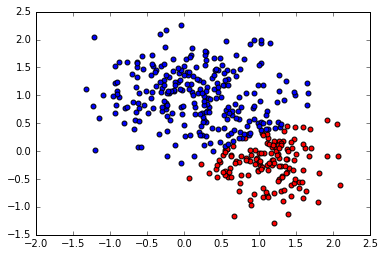

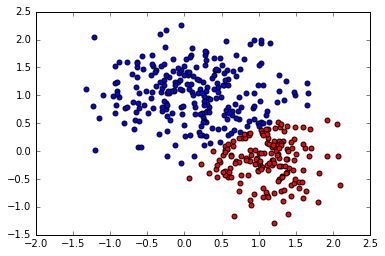

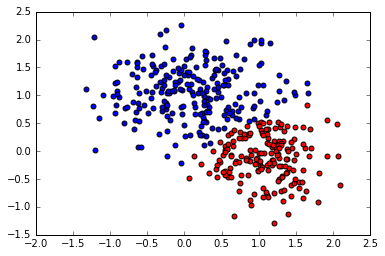

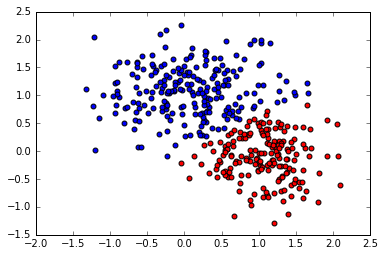

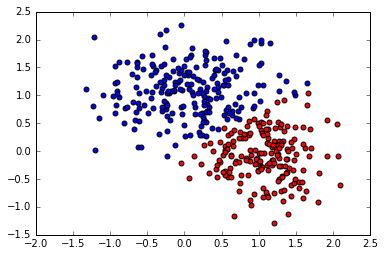

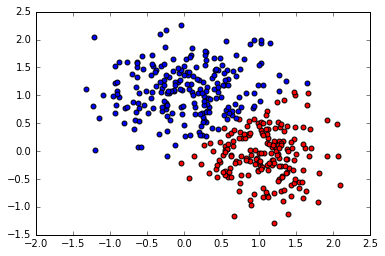

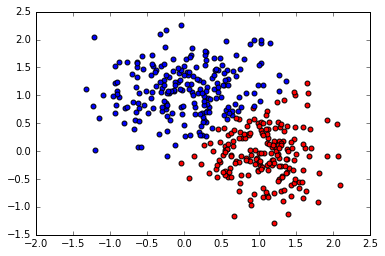

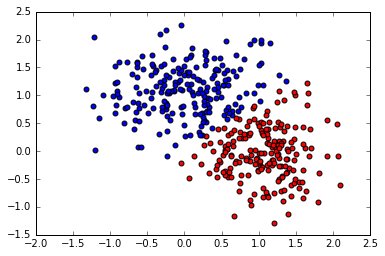

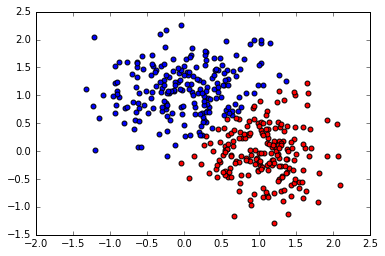

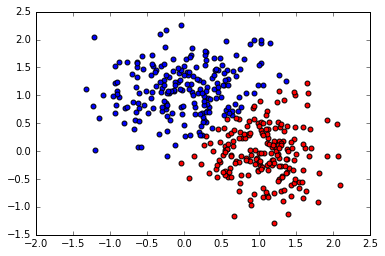

In [29]:
#!/usr/bin/python
import math
import scipy.io
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

data = scipy.io.loadmat('GMM-Points.mat')
# points = data['Points']
points = data['Points'][:, 0:2]
label = data['Points'][:, 2]
# points = [(0,),(1,), (2,)]
# points = [(0,0), (1, 0), (1,1),(2,2), (3,1), (3,0), (0,1), (3,2), (6,3)]
# points_x = []
# points_y = []
# for p in points:
#     points_x.append(p[0])
#     points_y.append(p[1])

means1 = [(0.3, 0.3)]
means2 = [(0.7, 0.7)]
sds1 = [(0.5, 0.5)]
sds2 = [(0.5, 0.5)]
probabilities = []
cluster1 = []
cluster2 = []
w1 = 0.5
w2 = 0.5

count = 0
while( True ):
    if count > 1:
        if np.sqrt(np.sum(np.square(means1[count][0] - means1[count-1][0])+np.square(means1[count][1] - means1[count-1][1]))) < 0.01:
            break
    cluster1 = []
    cluster2 = []
    for p in points:
        prob1 = w1 * multivariate_normal.pdf(p, mean=means1[count], cov=sds1[count])
        prob2 = w2 * multivariate_normal.pdf(p, mean=means2[count], cov=sds2[count])
        if (prob1 > prob2):
            cluster1.append(p)
        else:
            cluster2.append(p)
    means1.append(np.mean(cluster1,axis=0))
    means2.append(np.mean(cluster2,axis=0))
    sds1.append(np.std(cluster1,axis=0))
    sds2.append(np.std(cluster2,axis=0))
    w1 = (float(len(cluster1)) / len(points))
    w2 = (float(len(cluster2)) / len(points))
    count += 1
    
    cluster1 = np.array(cluster1)
    cluster2 = np.array(cluster2)

    fig = plt.figure()
    plt.scatter(cluster1[:,0], cluster1[:,1], 24, c='r')
    plt.scatter(cluster2[:,0], cluster2[:,1], 24, c='b')
    plt.show()
    fig.savefig('./Vanessa/iteration-'+str(count)+'.png')

cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)

fig = plt.figure()
plt.scatter(cluster1[:,0], cluster1[:,1], 24, c='r')
plt.scatter(cluster2[:,0], cluster2[:,1], 24, c='b')
plt.show()
fig.savefig('./Vanessa/iteration-'+str(count)+'.png')

# TODO 1: use scipy.stats.multivariate_normal instead of pdf function - somehow solved?
# TODO 2: plot graph from result


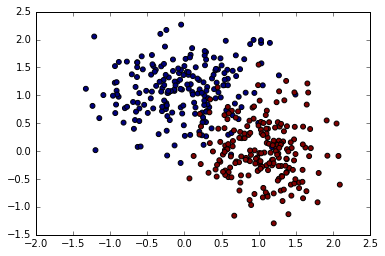

In [31]:
Data = loadmat('GMM-Points.mat')
Points = Data['Points'][:,0:2]
Label = Data['Points'][:,2]

fig = plt.figure()
plt.scatter(Points[:,0], Points[:,1], 24, c=Label)
plt.show()
fig.savefig('./Vanessa/originData.png')